
Dataset Shape: (1000, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   1000 non-null   object 
 1   Region    1000 non-null   object 
 2   Sales     1000 non-null   float64
 3   Profit    1000 non-null   float64
 4   Discount  1000 non-null   float64
 5   Category  1000 non-null   object 
 6   Date      1000 non-null   object 
dtypes: float64(3), object(4)
memory usage: 54.8+ KB
None

Missing Values:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


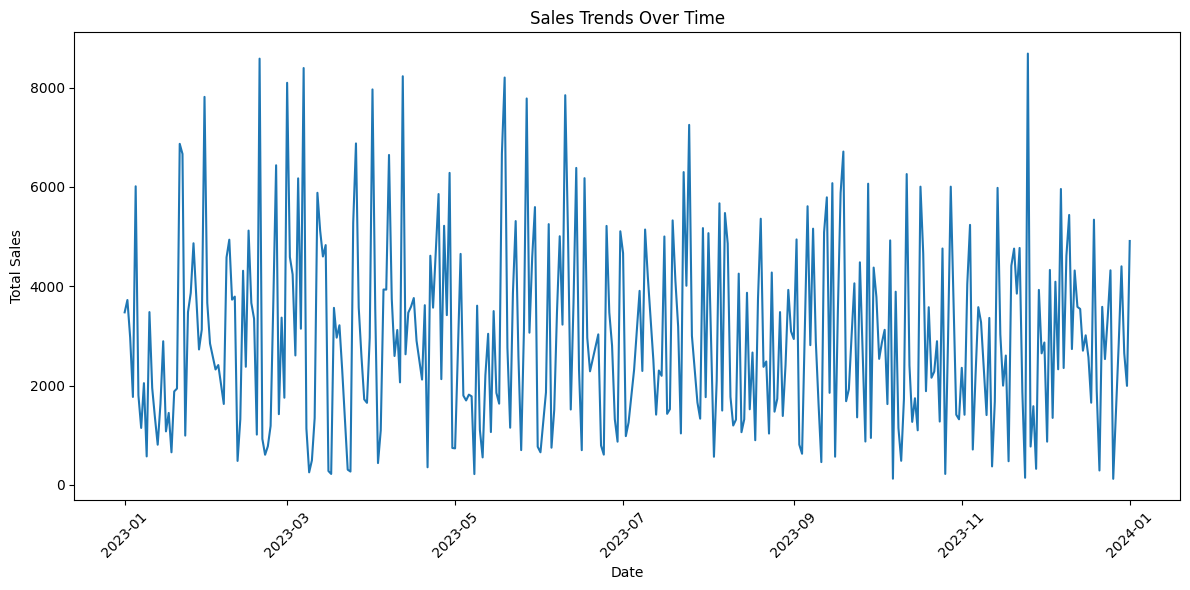

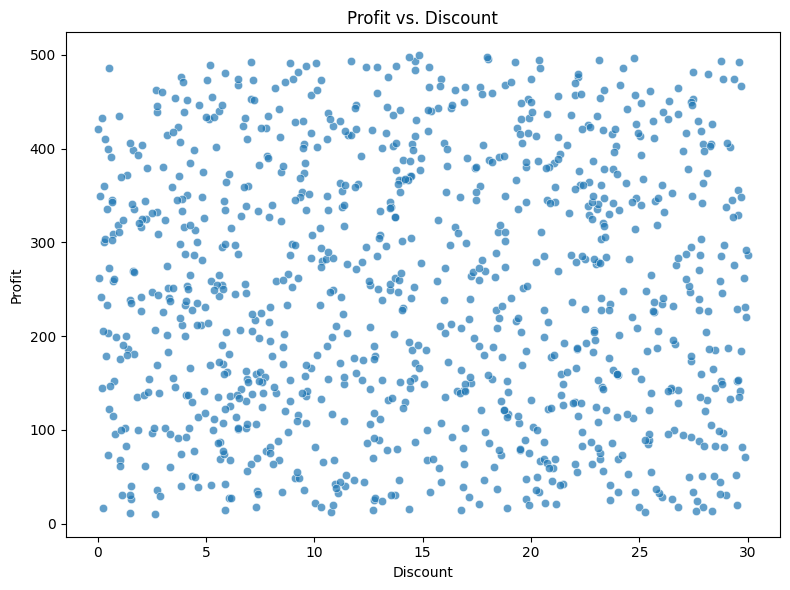

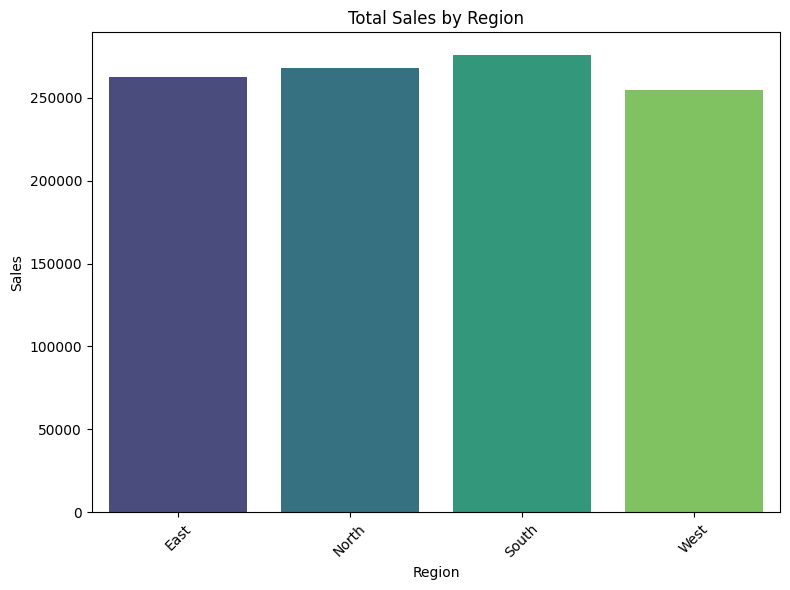

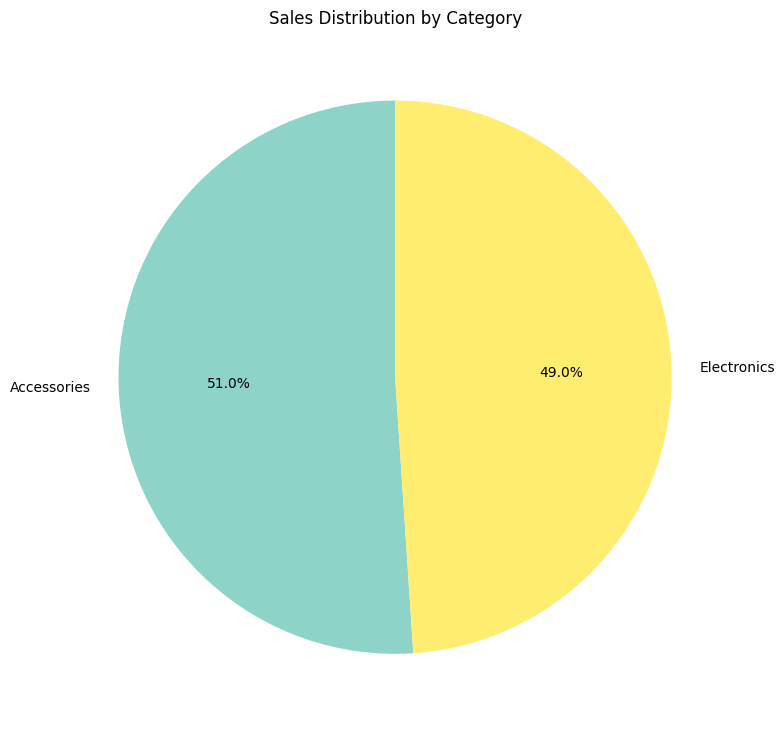


--- Predictive Model Evaluation ---
Mean Squared Error (MSE): 272295.21453080984
R² Score: -0.0030161330517730622


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Load and Explore Data
# Load the dataset
file_path = "C:\\datascience\\sales_data.csv"  # Update the path if necessary
df = pd.read_csv(file_path)
# Display dataset shape, info, and missing values
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
# 2. Data Cleaning
# Remove duplicate rows
df.drop_duplicates(inplace=True)
# Fill missing values
# For numerical columns, fill with median; for categorical columns, fill with mode.
numerical_cols = ['Sales', 'Profit', 'Discount']
categorical_cols = ['Product', 'Region', 'Category']

for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

# Convert the Date column to a datetime object for trend analysis
df['Date'] = pd.to_datetime(df['Date'])
# 3. Exploratory Data Analysis (EDA)
# a. Time Series Plot: Sales Trends Over Time
# Group by Date and sum Sales for each date
sales_over_time = df.groupby('Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# b. Scatter Plot: Profit vs. Discount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.7)
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

# c. Sales Distribution by Region and Category
# Bar plot: Total Sales by Region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
# To avoid palette warning, use Region for hue and disable legend
sns.barplot(data=sales_by_region, x='Region', y='Sales', hue='Region', palette="viridis")
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# Pie chart: Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Sales Distribution by Category')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.tight_layout()
plt.show()
# 4. Predictive Modeling
# Define features and target variable
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- Predictive Model Evaluation ---")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)